# Maps for paper

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")
from analysis import GEM

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import numpy as np

## Energy contributions in 2050

In [3]:
df = pd.read_csv("../data/2050-energy-projections.csv")


def weighted_mean(df, column, weight_column):
    return (df[column] * df[weight_column]).sum() / df[weight_column].sum()


# Apply weighted_mean to each desired column
for column in df.columns:
    if column != "total_power_GW" and column != "country":  # Skip the weight column
        w_mean = weighted_mean(df, column, "total_power_GW")
        print(f"{column}: {w_mean:.2f}")

on_shore_wind_pct: 23.52
off_shore_wind_pct: 13.63
wave_pct: 0.59
geothermal_pct: 0.66
hydro_pct: 4.02
tidal_pct: 0.06
resPV_pct: 14.90
comPV_pct: 11.59
utilPV_pct: 21.16
csp_pct: 9.68


In [4]:
df = pd.read_csv("../data/2050-energy-projections.csv")
df["solar"] = df["resPV_pct"] + df["comPV_pct"] + df["utilPV_pct"]
df["wind"] = df["on_shore_wind_pct"] + df["off_shore_wind_pct"]
df["solar_and_wind"] = df["solar"] + df["wind"]
df["solar"] = 100 * df["solar"] / df["solar_and_wind"]
df["wind"] = 100 * df["wind"] / df["solar_and_wind"]
df = df[["country", "solar", "wind", "total_power_GW"]]
# drop last row, which is the world
df = df.drop(df.index[-1])

In [5]:
# Fix country names
df.loc[df["country"] == "Russian Federation", "country"] = "Russia"
df.loc[df["country"] == "Congo, Dem. Republic", "country"] = "Dem. Rep. Congo" 
df.loc[df["country"] == "Dominican Republic", "country"] = "Dominican Rep."
df.loc[df["country"] == "Korea, Dem. People's Rep.", "country"] = "North Korea"
df.loc[df["country"] == "Korea, Republic of", "country"] = "South Korea"
df.loc[df["country"] == "Iran, Islamic Republic", "country"] = "Iran"
df.loc[df["country"] == "Bosnia and Herzegovina", "country"] = "Bosnia and Herz."
df.loc[df["country"] == "Chinese Taipei", "country"] = "Taiwan"
df.loc[df["country"] == "Macedonia, Republic of", "country"] = "North Macedonia"
df.loc[df["country"] == "Moldova, Republic of", "country"] = "Moldova"
df.loc[df["country"] == "Slovak Republic", "country"] = "Slovakia"
df.loc[df["country"] == "Syrian Arab Republic", "country"] = "Syria"
df.loc[df["country"] == "Tanzania, United Republic of", "country"] = "Tanzania"
df.loc[df["country"] == "Czech Republic", "country"] = "Czechia"

In [6]:
# Assign values for missing countries
new_rows = [
    {"country": "Afghanistan", "solar": 65, "wind": 35, "total_power_GW": 0},
    {"country": "Laos", "solar": 75, "wind": 25, "total_power_GW": 0},
    {"country": "Bhutan", "solar": 55, "wind": 45, "total_power_GW": 0},
    {"country": "Papua New Guinea", "solar": 60, "wind": 40, "total_power_GW": 0},
    {"country": "Madagascar", "solar": 50, "wind": 50, "total_power_GW": 0},
    {"country": "Somalia", "solar": 55, "wind": 45, "total_power_GW": 0},
    {"country": "Tanzania", "solar": 65, "wind": 35, "total_power_GW": 0},
    {"country": "Malawi", "solar": 65, "wind": 35, "total_power_GW": 0},
    {"country": "eSwatini", "solar": 45, "wind": 65, "total_power_GW": 0},
    {"country": "Lesotho", "solar": 45, "wind": 65, "total_power_GW": 0},
    {"country": "Côte d'Ivoire", "solar": 50, "wind": 50, "total_power_GW": 0},
    {"country": "Liberia", "solar": 50, "wind": 50, "total_power_GW": 0},
    {"country": "Sierra Leone", "solar": 50, "wind": 50, "total_power_GW": 0},
    {"country": "Guinea", "solar": 50, "wind": 50, "total_power_GW": 0},
    {"country": "Burkina Faso", "solar": 60, "wind": 40, "total_power_GW": 0},
    {"country": "Mali", "solar": 60, "wind": 40, "total_power_GW": 0},
    {"country": "Guinea-Bissau", "solar": 60, "wind": 40, "total_power_GW": 0},
    {"country": "Mauritania", "solar": 60, "wind": 40, "total_power_GW": 0},
    {"country": "Niger", "solar": 60, "wind": 40, "total_power_GW": 0},
    {"country": "Chad", "solar": 60, "wind": 40, "total_power_GW": 0},
    {"country": "S. Sudan", "solar": 60, "wind": 40, "total_power_GW": 0},
    {"country": "Central African Rep.", "solar": 60, "wind": 40, "total_power_GW": 0},
    {"country": "Rwanda", "solar": 60, "wind": 40, "total_power_GW": 0},
    {"country": "Burundi", "solar": 60, "wind": 40, "total_power_GW": 0},
    {"country": "Uganda", "solar": 60, "wind": 40, "total_power_GW": 0},
    {"country": "Gambia", "solar": 60, "wind": 40, "total_power_GW": 0},
    {"country": "Guyana", "solar": 50, "wind": 50, "total_power_GW": 0},
    {"country": "Suriname", "solar": 50, "wind": 50, "total_power_GW": 0},
    {"country": "Eq. Guinea", "solar": 60, "wind": 40, "total_power_GW": 0},
]
new_df = pd.DataFrame(new_rows)
df = pd.concat([df, new_df], ignore_index=True)

/tmp/ipykernel_11891/2584729142.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/tmp/ipykernel_11891/2584729142.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


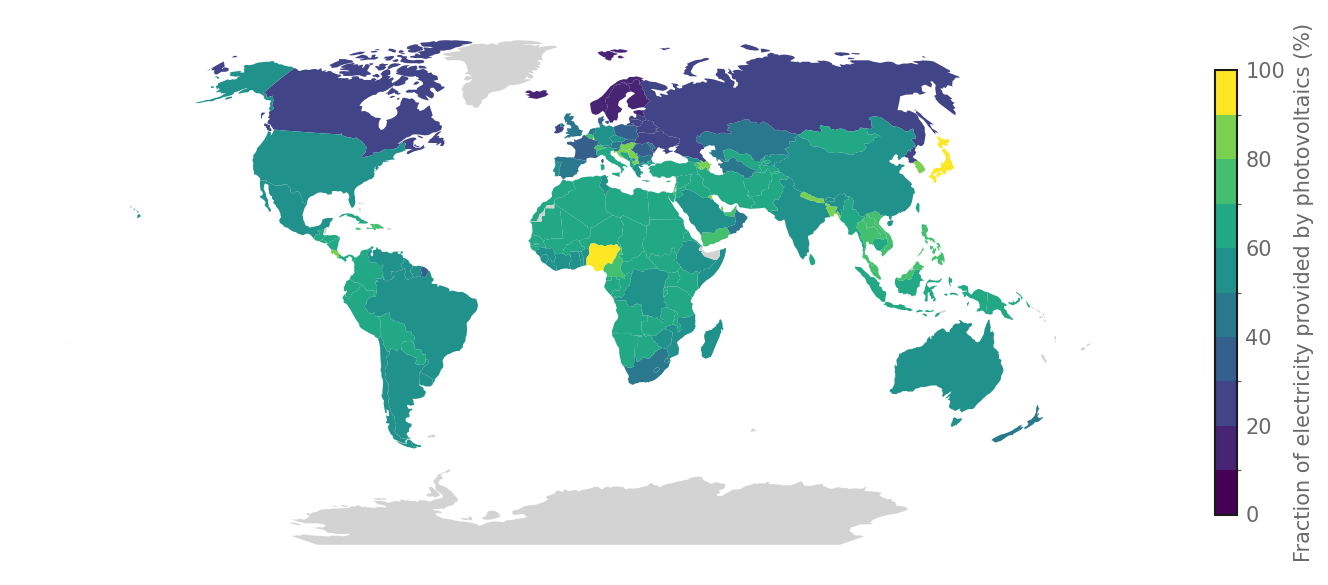

In [7]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.merge(df, left_on="name", right_on="country", how="left")
world = world.to_crs("+proj=wintri")


default_color = "lightgrey"

cmap = plt.cm.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, 11))
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(0, 101, 10)
norm = mcolors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(1, 1)
sm = world.plot(
    column="solar",
    cmap=cmap,
    norm=norm,
    legend=True,
    legend_kwds={
        "label": f"Fraction of electricity provided by photovoltaics (%)",
        "orientation": "vertical",
        "shrink": 0.8,
    },
    ax=ax,
    missing_kwds={"color": default_color},
)
# fig.colorbar(sm, ax=ax, label='Solar Value')
ax.set_axis_off()
ax.grid(False)
plt.tight_layout()
plt.savefig("../results/2050-energy-percentage.pdf", bbox_inches="tight")

## % reduction maps

In [33]:
year = 5

In [34]:
solar = pd.read_csv("../results/aggregate_yearly_solar_power.csv")
solar = solar[solar.Year==year]
solar["Fraction"] = 100 * solar["Fraction"]
name_mapping = {
    "United States": "United States of America",
    "DR Congo": "Dem. Rep. Congo",
    "Republic of the Congo": "Congo",
    "Dominican Republic": "Dominican Rep.",
    "Türkiye": "Turkey",
    "South Sudan": "S. Sudan",
    "Central African Republic": "Central African Rep.",
    "Czech Republic": "Czechia",
    "Bosnia and Herzegovina": "Bosnia and Herz.",
    "The Gambia": "Gambia",
    "Swaziland": "eSwatini",
}
solar["Country"] = solar["Country"].replace(name_mapping)

/tmp/ipykernel_11891/1560255803.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/tmp/ipykernel_11891/1560255803.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


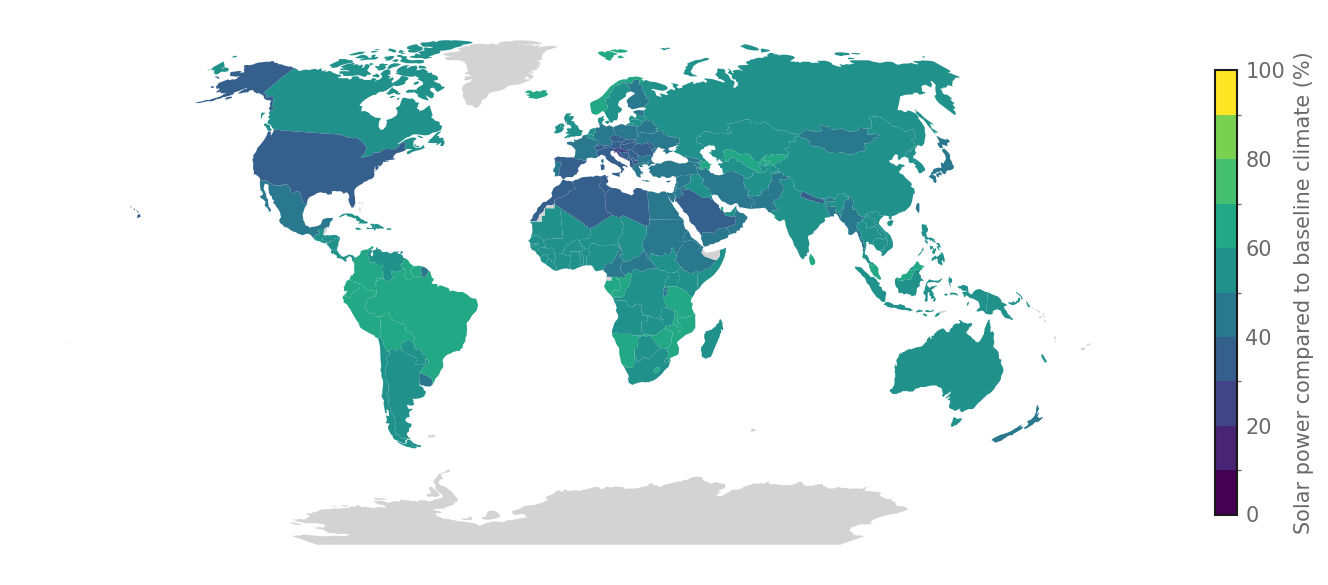

In [35]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.merge(solar, left_on="name", right_on="Country", how="left")
world = world.to_crs("+proj=wintri")


default_color = "lightgrey"

cmap = plt.cm.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, 11))
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(0, 101, 10)
norm = mcolors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(1, 1)
sm = world.plot(
    column="Fraction",
    cmap=cmap,
    norm=norm,
    legend=True,
    legend_kwds={
        "label": f"Solar power compared to baseline climate (%)",
        "orientation": "vertical",
        "shrink": 0.8,
    },
    ax=ax,
    missing_kwds={"color": default_color},
)
# fig.colorbar(sm, ax=ax, label='Solar Value')
ax.set_axis_off()
ax.grid(False)
plt.tight_layout()
plt.savefig(f"../results/solar-power-NW-year{year}.pdf", bbox_inches="tight")

In [36]:
wind = pd.read_csv("../results/aggregate_yearly_wind_power.csv")
wind = wind[wind.Year==year]
wind["Fraction"] = 100 * wind["Fraction"]
name_mapping = {
    "United States": "United States of America",
    "DR Congo": "Dem. Rep. Congo",
    "Republic of the Congo": "Congo",
    "Dominican Republic": "Dominican Rep.",
    "Türkiye": "Turkey",
    "South Sudan": "S. Sudan",
    "Central African Republic": "Central African Rep.",
    "Czech Republic": "Czechia",
    "Bosnia and Herzegovina": "Bosnia and Herz.",
    "Democratic Republic of the Congo": "Dem. Rep. Congo",
    "The Gambia": "Gambia",
    "Swaziland": "eSwatini",
    "Lybia": "Libya",
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Greenland": "Ignore",
}
wind["Country"] = wind["Country"].replace(name_mapping)

/tmp/ipykernel_11891/696630144.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/tmp/ipykernel_11891/696630144.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


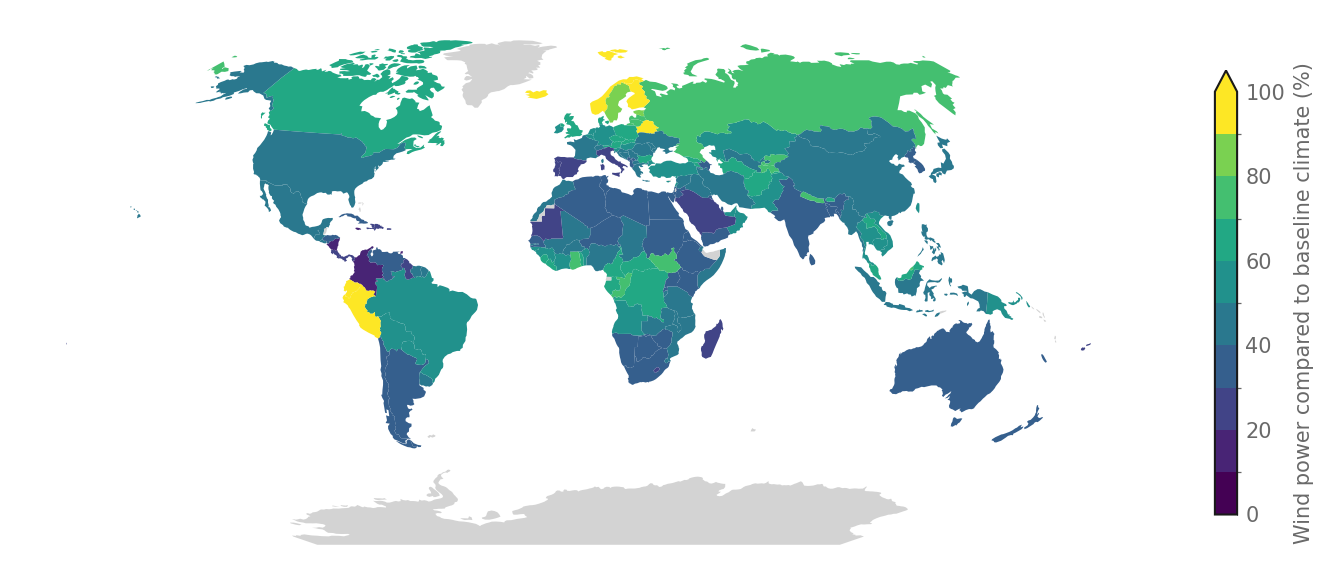

In [37]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.merge(wind, left_on="name", right_on="Country", how="left")
world = world.to_crs("+proj=wintri")


default_color = "lightgrey"

cmap = plt.cm.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, 11))
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(0, 101, 10)
norm = mcolors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(1, 1)
sm = world.plot(
    column="Fraction",
    cmap=cmap,
    norm=norm,
    legend=True,
    legend_kwds={
        "label": f"Wind power compared to baseline climate (%)",
        "orientation": "vertical",
        "shrink": 0.8,
        "extend": "max",
    },
    ax=ax,
    missing_kwds={"color": default_color},
)
ax.set_axis_off()
ax.grid(False)
plt.tight_layout()
plt.savefig(f"../results/wind-power-NW-year{year}.pdf", bbox_inches="tight")

In [38]:
df2 = df.rename(columns={"solar": "solar_contribution_baseline"})
df2 = df2.rename(columns={"wind": "wind_contribution_baseline"})
df2 = df2.rename(columns={"total_power_GW": "total_power_baseline_GW"})
df2["solar_contribution_baseline"] = df2["solar_contribution_baseline"] / 100
df2["wind_contribution_baseline"] = df2["wind_contribution_baseline"] / 100
solar["solar_fraction_NW"] = solar["Fraction"] / 100
wind["wind_fraction_NW"] = wind["Fraction"] / 100


df2 = df2.merge(solar, left_on="country", right_on="Country", how="left")
df2 = df2.merge(wind, left_on="country", right_on="Country", how="left")
df2 = df2.drop(columns=["Country_x", "Country_y"])
df2 = df2.drop(columns=["Fraction_x", "Fraction_y", "Year_x", "Year_y"])
df2["solar+wind_fraction_NW"] = (
    df2["solar_contribution_baseline"] * df2["solar_fraction_NW"] + df2["wind_contribution_baseline"] * df2["wind_fraction_NW"]
)
df2["solar+wind_pct_NW"] = 100 * df2["solar+wind_fraction_NW"]


/tmp/ipykernel_11891/3729024045.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/tmp/ipykernel_11891/3729024045.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


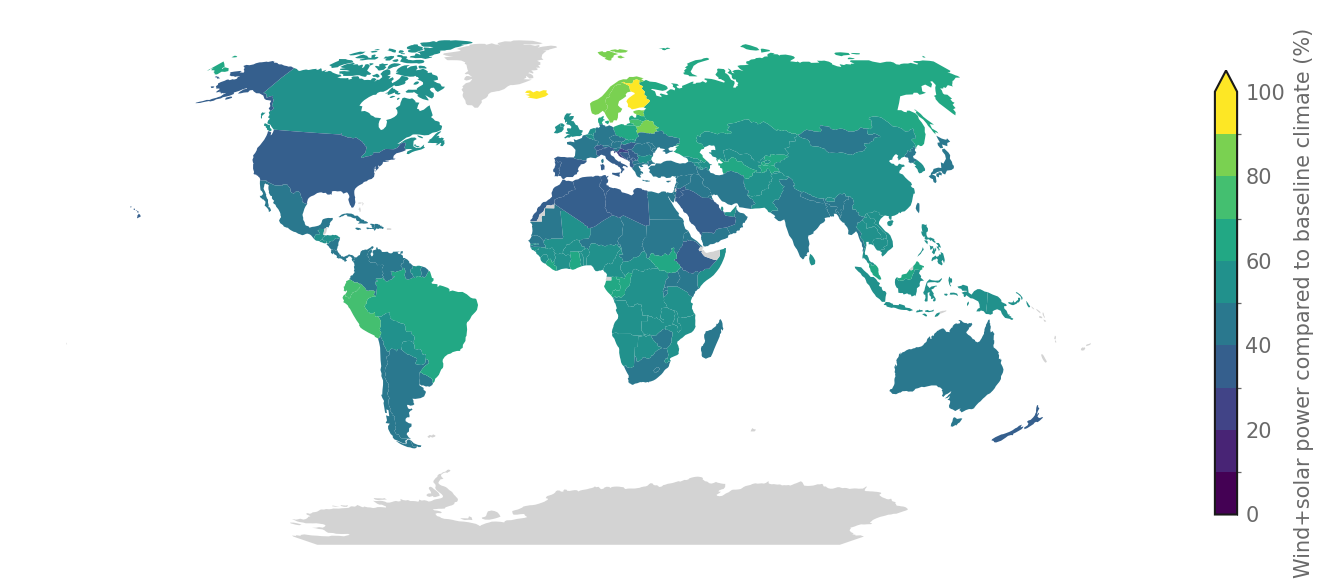

In [39]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.merge(df2, left_on="name", right_on="country", how="left")
world = world.to_crs("+proj=wintri")


default_color = "lightgrey"

cmap = plt.cm.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, 11))
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(0, 101, 10)
norm = mcolors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(1, 1)
sm = world.plot(
    column="solar+wind_pct_NW",
    cmap=cmap,
    norm=norm,
    legend=True,
    legend_kwds={
        "label": f"Wind+solar power compared to baseline climate (%)",
        "orientation": "vertical",
        "shrink": 0.8,
        "extend": "max",
    },
    ax=ax,
    missing_kwds={"color": default_color},
)
ax.set_axis_off()
ax.grid(False)
plt.tight_layout()
plt.savefig("../results/overall-power-NW-year{year}.pdf", bbox_inches="tight")

In [40]:
df2.to_csv(f"../results/solar+wind-NW-year{year}.csv")

In [16]:
df3 = df2.dropna()
df3

,country,solar_contribution_baseline,wind_contribution_baseline,total_power_baseline_GW,solar_fraction_NW,wind_fraction_NW,solar+wind_fraction_NW,solar+wind_pct_NW
0,Albania,0.687017,0.312983,2.1,0.087322,0.509465,0.219446,21.944608
1,Algeria,0.627891,0.372109,53.8,0.097395,0.549661,0.265687,26.568723
2,Angola,0.684627,0.315373,15.1,0.476582,0.686939,0.542923,54.292301
3,Argentina,0.575824,0.424176,74.8,0.398027,0.486779,0.435674,43.567358
4,Armenia,0.716252,0.283748,2.4,0.133913,0.743247,0.306810,30.681017
...,...,...,...,...,...,...,...,...
164,Burundi,0.600000,0.400000,0.0,0.573386,0.529613,0.555877,55.587710
165,Uganda,0.600000,0.400000,0.0,0.636326,0.411055,0.546217,54.621745
166,Gambia,0.600000,0.400000,0.0,0.310619,0.416213,0.352857,35.285656
167,Guyana,0.500000,0.500000,0.0,0.559402,0.216140,0.387771,38.777078


In [17]:
1-np.sum(df3["total_power_baseline_GW"]*df3["solar+wind_fraction_NW"]) / df3["total_power_baseline_GW"].sum()

0.5949171034740734

In [18]:
1-np.sum(
    df3["total_power_baseline_GW"]
    * df3["solar_fraction_NW"]
    * df3["solar_contribution_baseline"]
) / np.sum(df3["total_power_baseline_GW"] * df3["solar_contribution_baseline"])

0.7415359905448481

In [19]:
1-np.sum(
    df3["total_power_baseline_GW"]
    * df3["wind_fraction_NW"]
    * df3["wind_contribution_baseline"]
) / np.sum(df3["total_power_baseline_GW"] * df3["wind_contribution_baseline"])

0.40614641465004775

In [32]:
wind = pd.read_csv("../results/fraction_of_wind_power_countries.csv")
solar = pd.read_csv("../results/fraction_of_solar_power_countries.csv")

In [48]:
# iterate over columns of wind
total_wind_weight = 0
total_solar_weight = 0
for i, col in enumerate(wind.columns[1:]):
    if i == 0:
        total_wind = np.zeros(wind[col].shape)
        total_solar = np.zeros(solar[col].shape)
    try:
        if col == "United States":
            col = "United States of America"
        if col == "Democratic Republic of the Congo":
            col = "Dem. Rep. Congo"
        if col == "Türkiye":
            col = "Turkey"
        if col == "Central African Republic":
            col = "Central African Rep."
        if col == "South Sudan":
            col = "S. Sudan"
        if col == "Czech Republic":
            col = "Czechia"
        wind_weight = (df[df.country == col].wind.values[0] / 100) * df[
            df.country == col
        ].total_power_GW.values[0]
        solar_weight = (
            (df[df.country == col].solar.values[0] / 100)
            * df[df.country == col].total_power_GW.values[0]
        )
        total_wind += wind_weight * wind[col]
        total_solar += solar_weight * solar[col]
        total_wind_weight += wind_weight
        total_solar_weight += solar_weight
    except:
        continue
total_energy = (total_wind + total_solar) / (total_wind_weight + total_solar_weight)
total_wind = total_wind / total_wind_weight
total_solar = total_solar / total_solar_weight

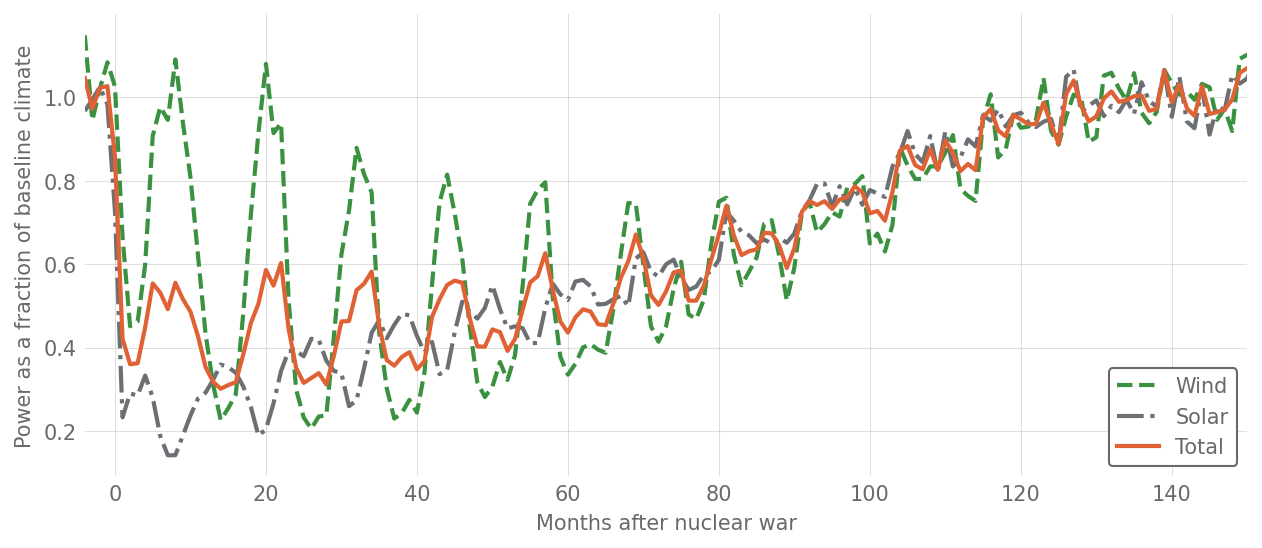

In [51]:
plt.close(66);plt.figure(66)
plt.plot(wind["Months_after_NW"], total_wind, ls="--", label="Wind")
plt.plot(solar["Months_after_NW"], total_solar, ls="-.", label="Solar")
plt.plot(solar["Months_after_NW"], total_energy, label="Total")
plt.xlim(-4, 150)
plt.xlabel("Months after nuclear war")
plt.ylabel("Power as a fraction of baseline climate")
plt.legend()
plt.savefig("../results/power-time-series.pdf", bbox_inches="tight")